**АНАЛИЗ РАЗВЛЕКАТЕЛЬНОГО ПРИЛОЖЕНИЯ**

## Загрузка данных и подготовка их к анализу

### Загрузка данных

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

#### Чтение файлов

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')#визиты
orders = pd.read_csv('/datasets/orders_info_short.csv')#заказы
costs = pd.read_csv('/datasets/costs_info_short.csv')#расходы

#### Получение общих сведений о датафреймах с визитами, заказами и расходами

Обзор датафрейма visits:

In [3]:
visits.info()
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


Обзор датафрейма orders:

In [4]:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


Обзор датафрейма costs:

In [5]:
costs.info()
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


#### Вывод

**Таблица visits (с информацией о посещениях сайта):**


User Id — уникальный идентификатор пользователя

Region - страна пользователя

Device — категория устройства пользователя

Channel — идентификатор рекламного источника, из которого пришел пользователь

Session start — дата и время начала сессии

Session End — дата и время окончания сессии



**Таблица orders(информация о заказах):**


User Id — уникальный id пользователя, который сделал заказ

Event Dt — дата и время покупки

Revenue — выручка


**Таблица costs (информация о затратах на маркетинг):**

Dt — дата

Channel — идентификатор рекламного источника

Costs — затраты на этот рекламный источник в этот день

Необходимо преобразовать тип данных даты и времени, а также привести все записи к нижнему регистру.

### Подготовка данных к анализу - предобработка данных

#### Работа с пропусками

In [6]:
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64

In [7]:
display(visits.isna().mean())
display(orders.isna().mean())
display(costs.isna().mean())

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

Пропусков в данных не выявлено.

#### Поиск дубликатов

In [8]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Явных дубликатов в данных не вяывлено.

#### Работа с типами данных

In [9]:
# приведем наименования столбцов к нижнему регистру

for i in [visits, orders, costs]:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values]

In [10]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [11]:
# проверка

for i in [visits, orders, costs]:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

#### Вывод

На этапе подготовки данных к анализу:

- пропусков в данных не выявлено;
- явных дубликатов не обнаружено;
- данные приведены к одному регистру;
- преобразован формат данных по работе с датой и временем.

## Функциия для расчёта и анализа LTV, ROI, удержания и конверсии.

**Задание:**

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

 **Функция для создания пользовательских профилей**

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format = '%Y-%m-%d')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

 **Функция для расчета удержания**

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчета конверсии**

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчета LTV и ROI**

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

 **Функция для сглаживания фрейма**

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

 **Функция для визуализации удержания**

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

 **Функция для визуализации конверсии**

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

 **Функция для визуализации LTV и ROI**

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Подготовлены функции для дальнейшего использования при вычислении метрик:

- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

## Исследовательский анализ данных

**Задание:**


- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

#### Составление профилей пользователей. 

Используем функцию get_profile и передадим есть данные о посещениях, покупках и тратах на рекламу.

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Мы принимаем за горизонт анализа 2 недели, а за момента анализа - 1 ноября

In [21]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

#### Определение минимальной даты привлечения пользователей.

In [22]:
print(f'Минимальная дата привлечения пользователей {profiles.first_ts.min()}') 

Минимальная дата привлечения пользователей 2019-05-01 00:00:41


####  Определение максимальной даты привлечения пользователей.

In [23]:
print(f'Максимальная дата привлечения пользователей {profiles.first_ts.max()}') 

Максимальная дата привлечения пользователей 2019-10-27 23:59:04


#### Вывод

- С помощью функции get_profiles() составлена таблица с профилями пользователей;
- Определена минимальная дата привлечения пользователей 2019-05-01 00:00:41;
- Определена максимальная дата привлечения пользователей 2019-10-27 23:59:04;
- За горизонт анализа принят срок в 2 недели, а за момент анализа - 1 ноября.

### Изучение из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.

#### Изучение из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

Изучение из каких стран пользователи приходят в приложение

In [24]:
print(profiles.region.unique())

['United States' 'France' 'Germany' 'UK']


**Пользователи приходят в приложение из США, Франции, Германии и Великобритании**

Изучение на какую страну приходится больше всего платящих пользователей

In [25]:
region_users = (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left')
)

Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны

In [26]:
region_users.set_axis(['region', 'total_users', 'payers'], axis='columns', inplace=True)
region_users['payer_rate'] = region_users.payers / region_users.total_users
display(region_users.sort_values(by='payer_rate', ascending=False))

,region,total_users,payers,payer_rate
3,United States,100002,6902,0.069019
1,Germany,14981,616,0.041119
2,UK,17575,700,0.039829
0,France,17450,663,0.037994


In [27]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

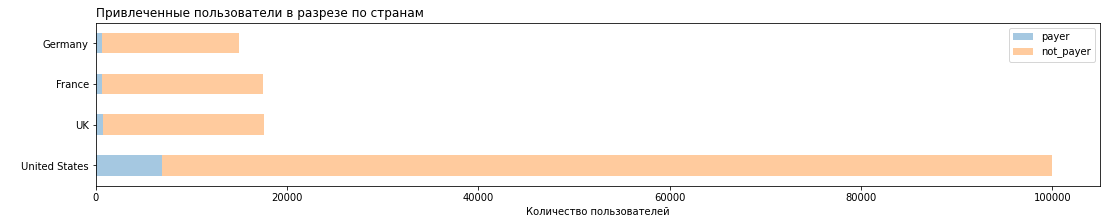

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [28]:
fig, ax = plt.subplots(figsize=(18, 3))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе по странам',loc='left')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

**Больше всего пользователей и платящих пользователей приходят в приложение из США (7%). Далее по количеству идут страны Европы Германия и Франция (4%) и Великобритания (4%).**

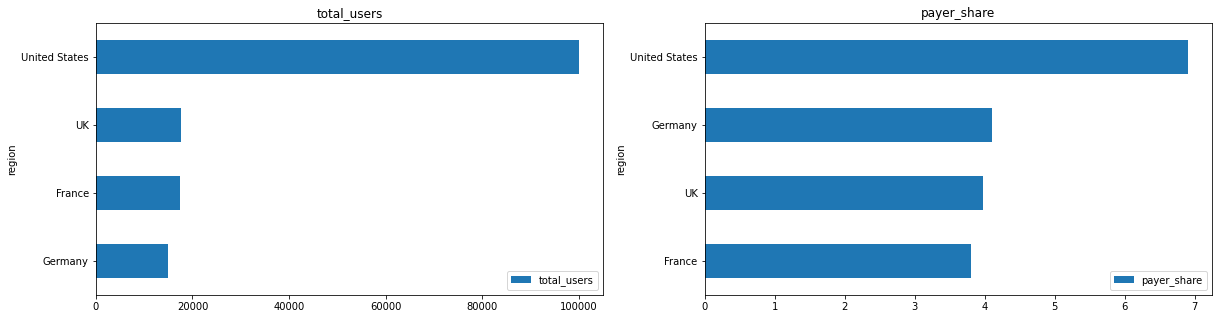

In [29]:
# ячейка ревьюера:
tmp = region.copy().reset_index()
tmp['total_users'] = tmp['payer'] + tmp['not_payer']

columns = ['total_users', 'payer_share']
plt.subplots(figsize = (20, 5))
for i, col in enumerate(columns):
    tmp.sort_values(by=col).plot(kind='barh', x='region', y=col, 
                                    ax = plt.subplot(1, 2, i + 1))
    plt.title(col)

    
plt.show()

#### Вывод

- Больше всего пользователей в США, как и доля платящих пользователей (7%).
- В Великобритании и Франции практически одинаковое количество пользователей, как и доля платящих пользователей (чуть меньше 4%)
- В Германии меньше всего пользователей по сравнению с другими странами, однако платящих пользователей больше, чем в Великобритании и Франции (чуть больше 4%)


### Анализ, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.

#### Анализ, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

 Анализ, какими устройствами пользуются клиенты

In [30]:
print(profiles.device.unique())

['Mac' 'iPhone' 'PC' 'Android']


**Пользователи выбирают устройства от фирмы Apple и те, что используют операционные системы PC и Android**

Анализ, какие устройства предпочитают платящие пользователи

In [31]:
device_users = (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), on = 'device', how = 'left')
)

Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны

In [32]:
device_users.set_axis(['device', 'total_users', 'payers'], axis='columns', inplace=True)
device_users['payer_rate'] = device_users.payers / device_users.total_users
device_users.sort_values(by='payer_rate', ascending=False)

,device,total_users,payers,payer_rate
1,Mac,30042,1912,0.063644
3,iPhone,54479,3382,0.062079
0,Android,35032,2050,0.058518
2,PC,30455,1537,0.050468


In [33]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

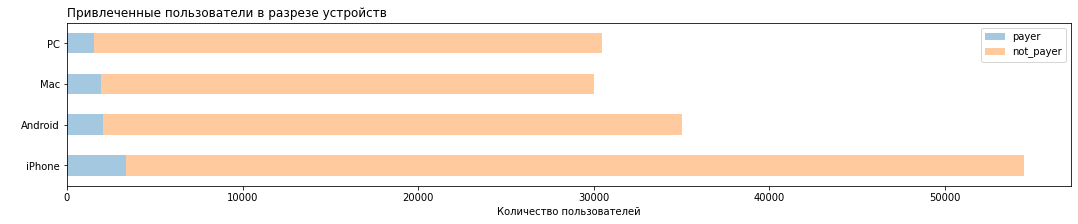

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


In [34]:
fig, ax = plt.subplots(figsize=(18, 3))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе устройств',loc='left')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

**Фирму Apple выбирает наибольшее количество пользователей и среди них более высокая доля платящих пользователей (около 6%), по сравнению с  операционные системами PC (5%) и Android (чуть меньше 6%)**

#### Вывод

Фирму Apple выбирает наибольшее количество пользователей и среди них более высокая доля платящих пользователей (около 6%), по сравнению с операционные системами PC (5%) и Android (чуть меньше 6%).

### Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.

#### Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. 

Изучение рекламных источников привлечения

In [35]:
print(profiles.channel.unique())

['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


Пользователи перешли из таких рекламных каналов как:

- FaceBoom
- AdNonSense
- YRabbit
- MediaTornado
- RocketSuperAds
- LeapBob
- TipTop
- WahooNetBanner
- OppleCreativeMedia
- lambdaMediaAds
- органический поиск

Определение каналов, из которых пришло больше всего платящих пользователей

In [36]:
ch_users = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), on = 'channel', how = 'left')
)

Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения

In [37]:
ch_users.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)
ch_users['payer_rate'] = ch_users.payers / ch_users.total_users
ch_users.sort_values(by='payer_rate', ascending=False)

,channel,total_users,payers,payer_rate
1,FaceBoom,29144,3557,0.122049
0,AdNonSense,3880,440,0.113402
9,lambdaMediaAds,2149,225,0.104700
6,TipTop,19561,1878,0.096007
5,RocketSuperAds,4448,352,0.079137
7,WahooNetBanner,8553,453,0.052964
8,YRabbit,4312,165,0.038265
3,MediaTornado,4364,156,0.035747
2,LeapBob,8553,262,0.030633
4,OppleCreativeMedia,8605,233,0.027077


In [38]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

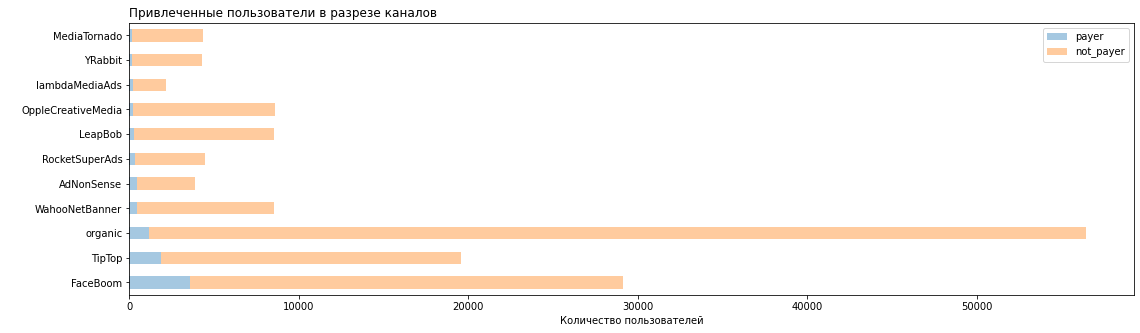

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
organic,55279,1160,2.06
WahooNetBanner,8100,453,5.30
AdNonSense,3440,440,11.34
RocketSuperAds,4096,352,7.91
LeapBob,8291,262,3.06
OppleCreativeMedia,8372,233,2.71
lambdaMediaAds,1924,225,10.47


In [39]:
fig, ax = plt.subplots(figsize=(18, 5))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе каналов',loc='left')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel

#### Вывод

Пользователи перешли из таких рекламных каналов как:

- FaceBoom
- AdNonSense
- YRabbit
- MediaTornado
- RocketSuperAds
- LeapBob
- TipTop
- WahooNetBanner
- OppleCreativeMedia
- lambdaMediaAds
- органический поиск

Среди них больше всего пользователей пришло из каналов: FaceBoom и TipTop, а также превуалирующая доля пользователй перешла по органическому поиску.

При этом доля платящих пользователей выше всего у каналов: FaceBoom, AdNonSense, lambdaMediaAds и TipTop.

### Вывод

Исследовательский анализ данных показал:

- Больше всего пользователей в США, как и доля платящих пользователей (7%).В Англии и Франции практически одинаковое количество пользователей, как и доля платящих пользователей (чуть меньше 4%)В Германии меньше всего пользователей по сравнению с другими странами, однако платящих пользователей больше, чем в Англии и Франции (чуть больше 4%)

- Пользователи больше всего предпочитают использовать мобильные устройства для входа в приложение. В целом фирму Apple выбирает наибольшее количество пользователей и среди них более высокая доля платящих пользователей (около 6%), по сравнению с операционные системами PC (5%) и Android (чуть меньше 6%).

- Больше всего пользователей пришло из каналов: FaceBoom и TipTop, а также превуалирующая доля пользователй перешла по органическому поиску. При этом доля платящих пользователей выше всего у каналов: FaceBoom, AdNonSense, lambdaMediaAds и TipTop. 

## Маркетинг

**Задание:**


- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Расчет общей суммы расходов на маркетинг.

In [41]:
print(f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}')

Общая сумма затрат на рекламу: 105497.0


**Общая сумма затрат на рекламу: 105497.0**

### Анализ распределения трат по рекламным источникам.

Анализ трат на каждый источник трафика

In [42]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False).reset_index()

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


**Больше всего средств израсходовано на каналы: TipTop,FaceBoom,WahooNetBanner и AdNonSense. При том, на каналы TipTop и FaceBoom израсходовано значительное количество всех средств и возможно причина неокупаемости рекламы будет крыться в этих источниках.**

In [43]:
# ячейка ревьюера:

# добавить новый столбец
tmp = costs.groupby('channel')['costs'].sum().sort_values(ascending=False).reset_index()
tmp['share'] = tmp['costs'] / tmp['costs'].sum()
tmp

,channel,costs,share
0,TipTop,54751.30,0.518983
1,FaceBoom,32445.60,0.307549
2,WahooNetBanner,5151.00,0.048826
3,AdNonSense,3911.25,0.037074
4,OppleCreativeMedia,2151.25,0.020392
5,RocketSuperAds,1833.00,0.017375
6,LeapBob,1797.60,0.017039
7,lambdaMediaAds,1557.60,0.014764
8,MediaTornado,954.48,0.009047
9,YRabbit,944.22,0.008950


In [44]:
# ячейка ревьюера:

# или использовать расчет при агрегации данных или добавить с помощью метода assign:
(costs.groupby('channel').agg(costs_total = ('costs','sum'),
                              share = ('costs',lambda x: x.sum()/costs['costs'].sum()))
                         .assign(share_2 = lambda x: x.costs_total / x.costs_total.sum())     
)

,costs_total,share,share_2
channel,,,
AdNonSense,3911.25,0.037074,0.037074
FaceBoom,32445.60,0.307549,0.307549
LeapBob,1797.60,0.017039,0.017039
MediaTornado,954.48,0.009047,0.009047
OppleCreativeMedia,2151.25,0.020392,0.020392
RocketSuperAds,1833.00,0.017375,0.017375
TipTop,54751.30,0.518983,0.518983
WahooNetBanner,5151.00,0.048826,0.048826
YRabbit,944.22,0.008950,0.008950


### Визуализация динамики изменения расходов во времени по каждому источнику.

In [45]:
#добавим столбцы с номером недели и месяца
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

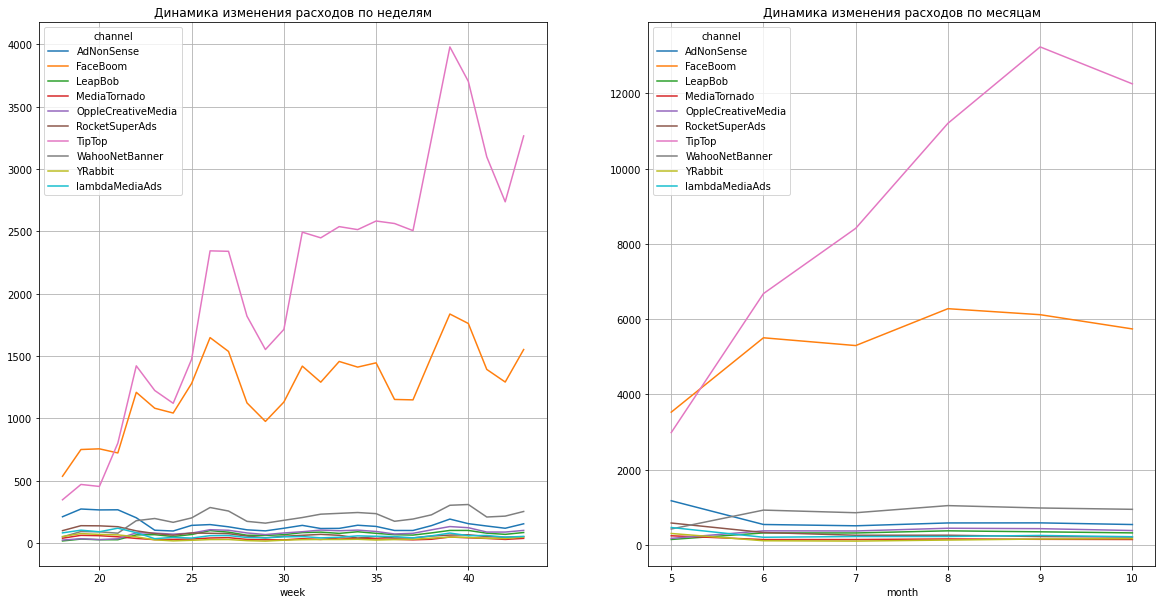

In [46]:
#строим графики
plt.figure(figsize=(20, 10))
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по неделям')

costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по месяцам')
plt.show()

**Замечен общий рост затрат на рекламу. Каналы Tip Top и FaceBoom значительно выбиваются из общего затраченных средств.**

### Анализ средней стоимости привлечения одного пользователя (CAC) из каждого источника. 

Рассчитаем совокупные затраты компании на привлечение одного покупателя (средний CAC на одного пользователя для всех каналов, исключая органический поиск).

In [47]:
cac_person = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_person

acquisition_cost    1.127481
dtype: float64

Расчитаем САС по источникам трафика.

In [48]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Дороже всего привлекать пользователей из каналов: TipTop,FaceBoom и AdNonSense**

### Вывод

Обшая сумма расходов на маркетинг - 105497.0

Больше всего средств израсходовано на каналы: TipTop,FaceBoom,WahooNetBanner и AdNonSense.

По графику динамики отмечается рост застрат на рекламу.

Дороже всего привлекать пользователей из каналов: TipTop,FaceBoom и AdNonSense.

По графику динамики трат по неделям и месяцам виден резкий рост затрат на каналы Tip Top и FaceBoom.



## Оценка окупаемости рекламы

**Задание:**


Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Исключим из анализа органический переход пользователей

In [49]:
profiles_no = profiles.query('channel != "organic"')

 Общая окупаемость рекламы

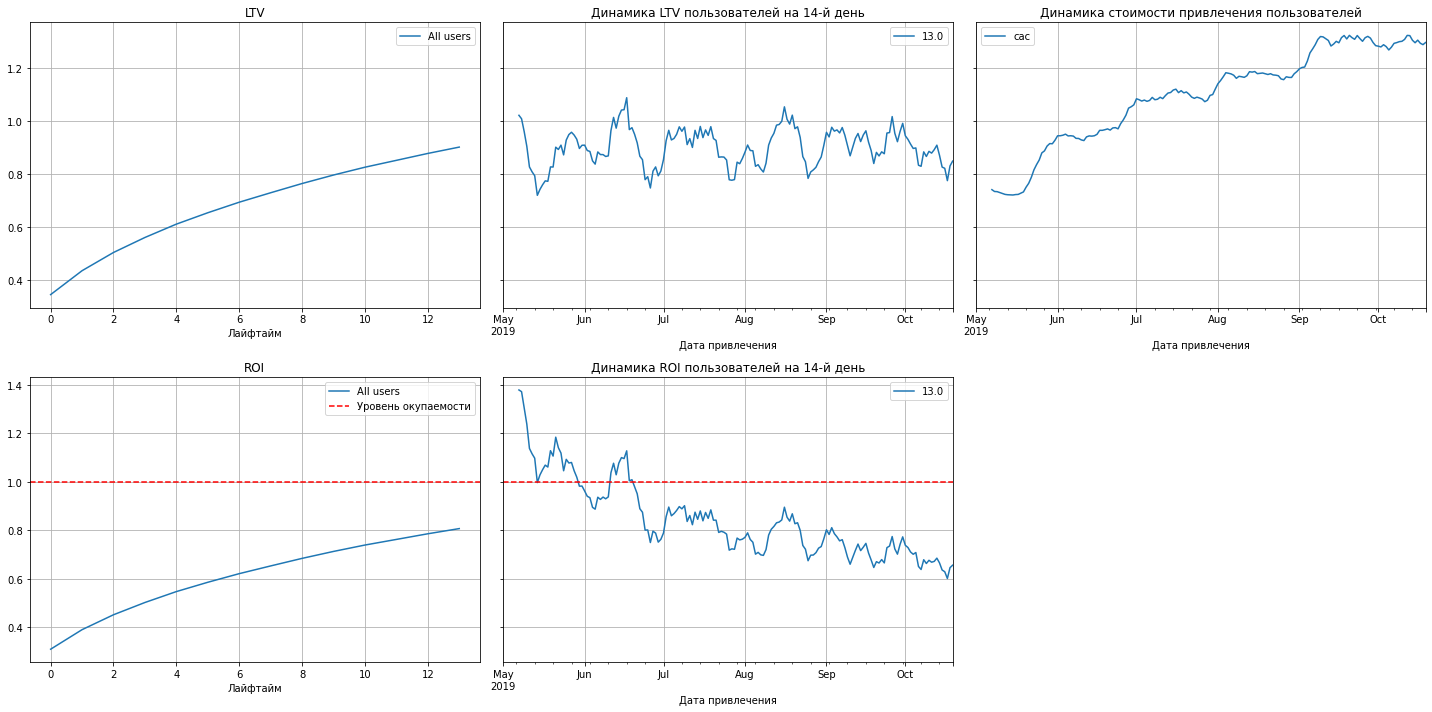

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Графики демонстрируют проблемы с окупаемости рекламы в разрезе двухнедельного периода. CAC растет - то есть затраты на рекламу растут, но при этом ROI падает - значит, что инвестиции не окупаются.По графику ROI замечено, что окупаемость на период горизонта анализа (14 день) не достигнута и находится на отметке 0.8**

 **Окупаемость рекламы с разбивкой по устройствам**

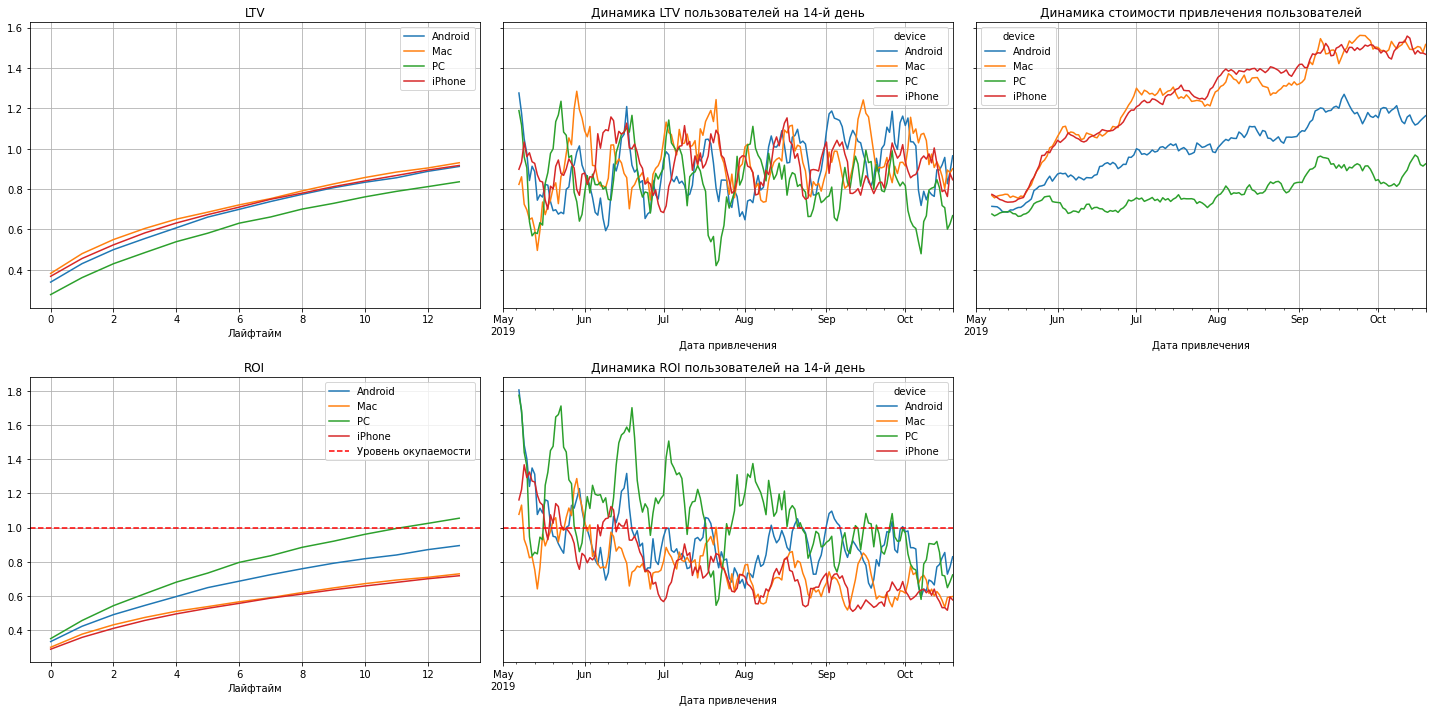

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**По графикам можно отметить, что самая низкая окупаемость у владельцев фирмы Apple, но при этом вероятно, что плохая окупаемость не связана с типом устройства, так как резких колебаний в отдельный единицах график не демонстрирует.**

**Окупаемость рекламы с разбивкой по странам**

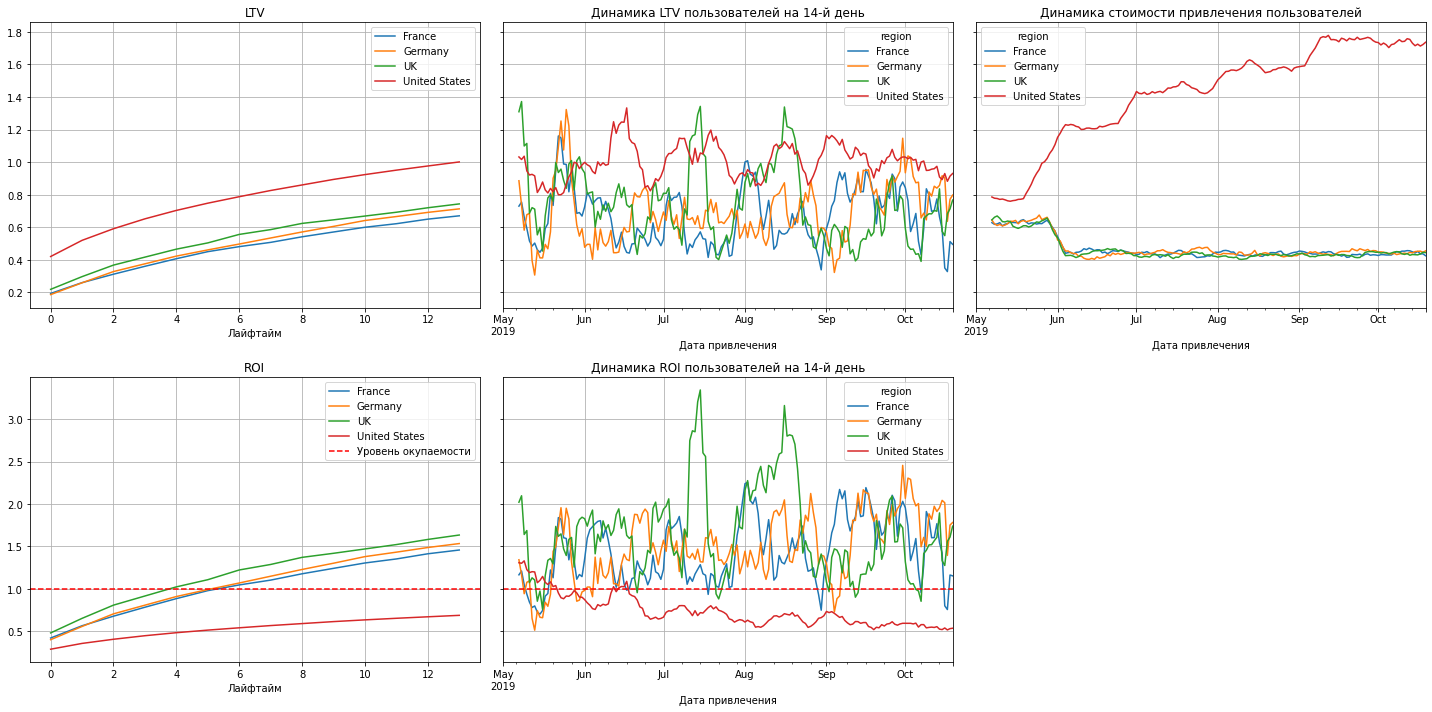

In [52]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

In [53]:
# Посмотрим какие каналы привлеечения больше всего используются в каких странах

region_channels = (
    profiles[profiles['payer']==True].pivot_table(index='channel', 
                                              columns = 'region', 
                                              values = 'user_id', 
                                              aggfunc='count')
    .reset_index()
    .sort_values('United States')
    .query('channel != "organic"')
)
region_channels

region,channel,France,Germany,UK,United States
3,MediaTornado,NaN,NaN,NaN,156.0
8,YRabbit,NaN,NaN,NaN,165.0
5,RocketSuperAds,NaN,NaN,NaN,352.0
6,TipTop,NaN,NaN,NaN,1878.0
1,FaceBoom,NaN,NaN,NaN,3557.0
0,AdNonSense,150.0,142.0,148.0,NaN
2,LeapBob,90.0,69.0,103.0,NaN
4,OppleCreativeMedia,80.0,64.0,89.0,NaN
7,WahooNetBanner,152.0,148.0,153.0,NaN
9,lambdaMediaAds,82.0,67.0,76.0,NaN


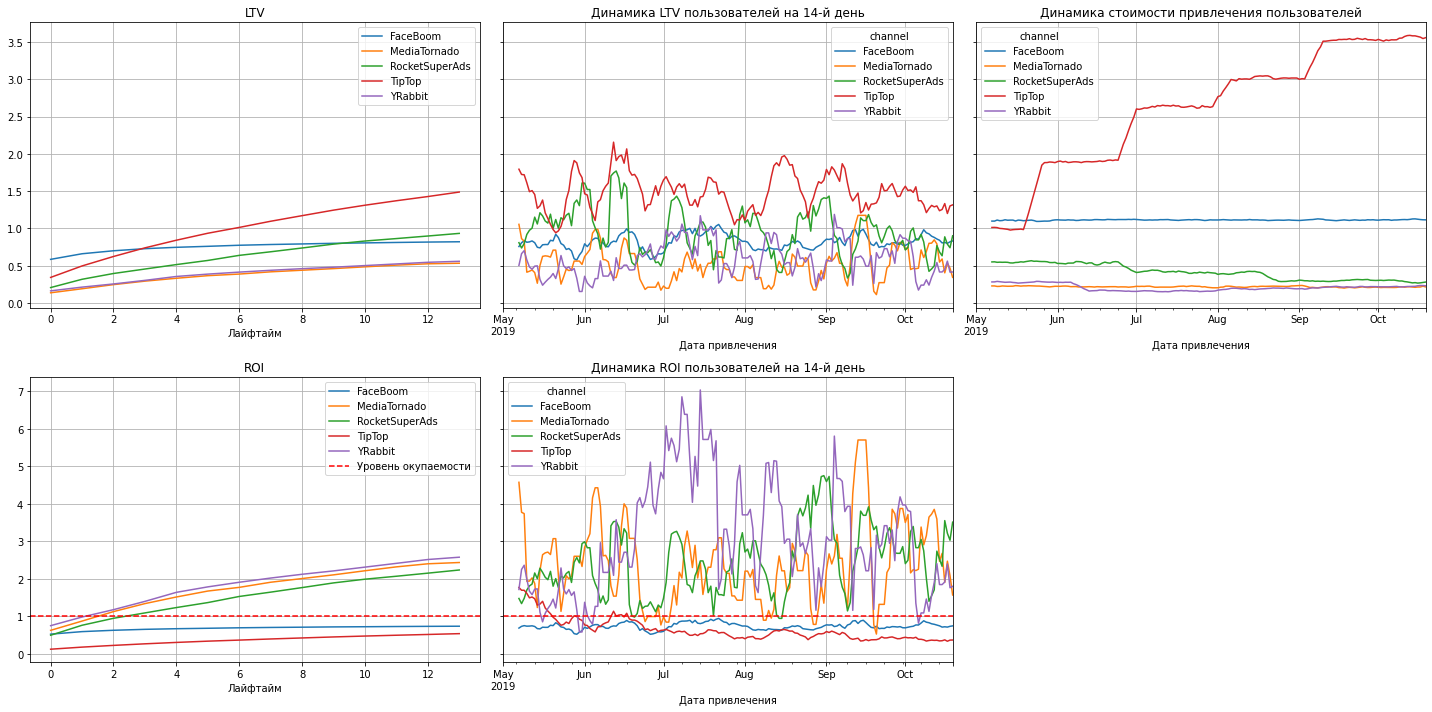

In [54]:
# посмотрим отдельно окупаемость каналов США поскольку это основной рынок покупателей

usa_channels = region_channels.loc[region_channels['United States'] > 0,'channel']

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no.query('channel in @usa_channels'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**Графики показывают, что пользователи в США обходятся дороже всего и при этом возникают проблемы с окупаемостью**

 **Окупаемость рекламы с разбивкой по рекламным каналам**

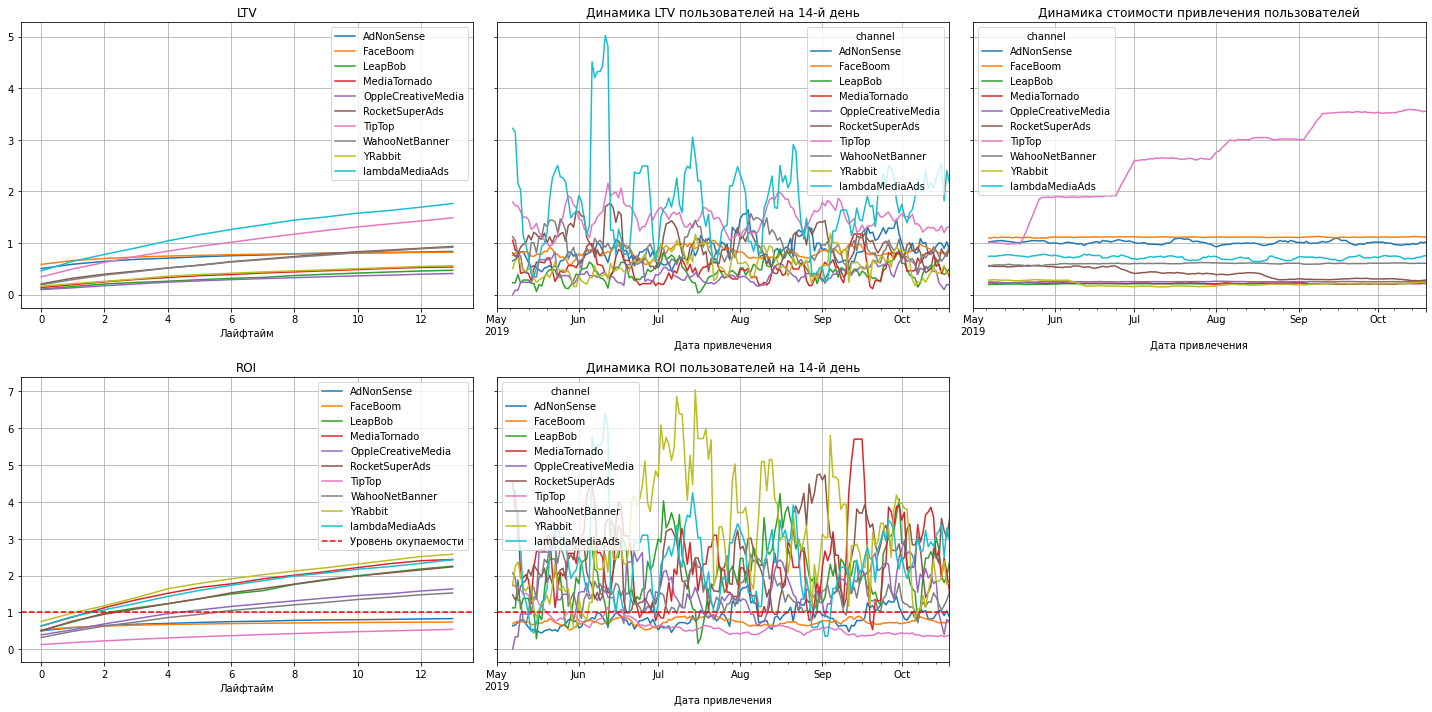

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
)

**Графики демонстрируют ситуацию, что во всех каналах, кроме: TipTop, FaceBoom и AdNonSense реклама окупается. При этом затраты на рекламу резко возрастают по каналу TipTop** 

### Конверсия пользователей и динамика её изменения. Графики.

**Смотрим конверсию с разбивкой по устройствам**

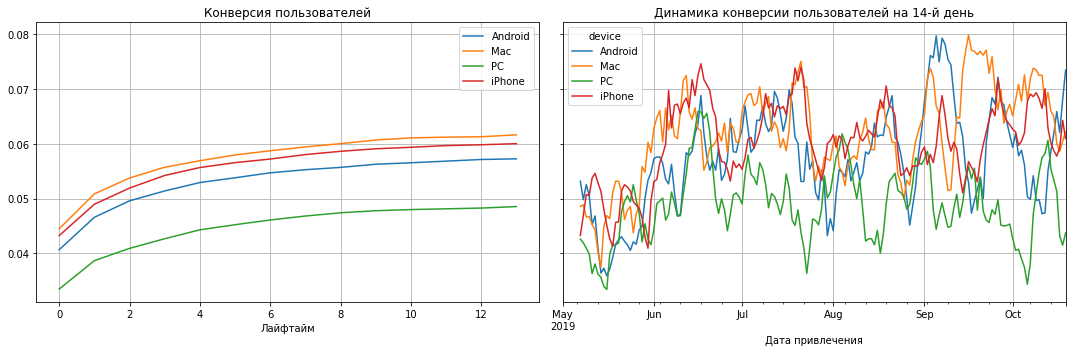

In [56]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**По графикам можно отметить, что выше всего конверсия у пользователей фирмы Apple, ниже всего - у PC**

**Смотрим конверсию с разбивкой по странам**

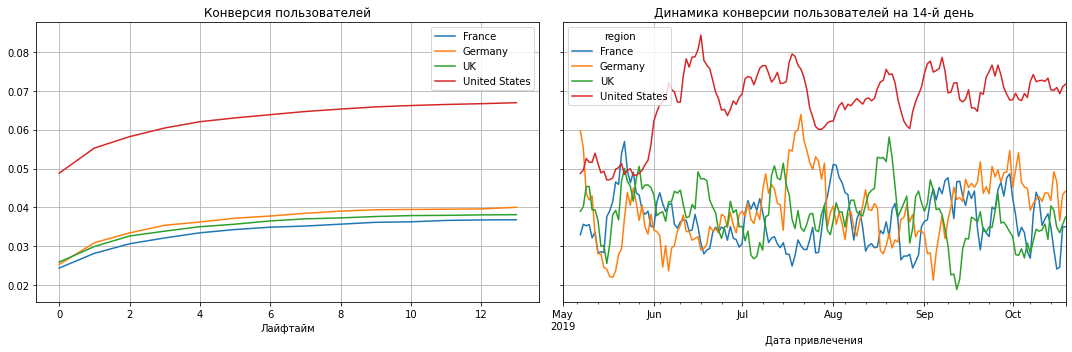

In [57]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**По графикам можно отметить, что выше всего конверсия у пользователей из США, ее показатель значительно отличается от показаетля конверсии у пользователей из других стран**

**Смотрим конверсию с разбивкой по каналам привлечения**

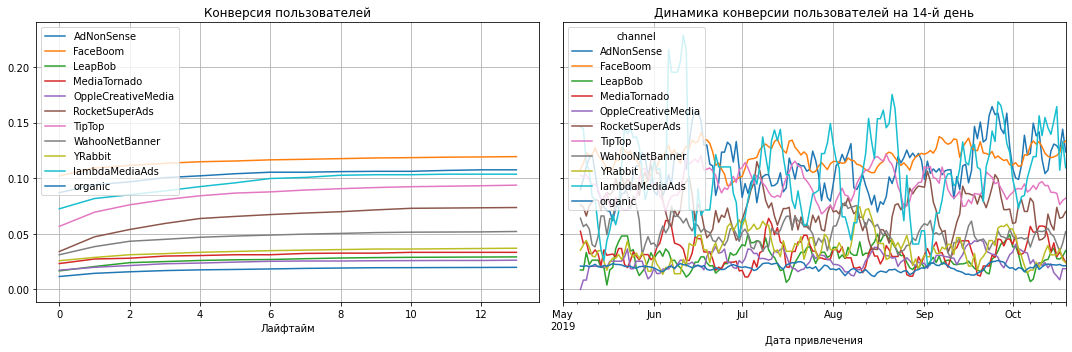

In [58]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**По графикам можно отметить, что выше всего конверсия у пользователей из рекламного канала FaceBoom. В целом динамики конверсии не наблюдается не у одного из рекламных каналов**

### Удержание пользователей и его изменение. Графики.

**Смотрим удержание с разбивкой по устройствам**

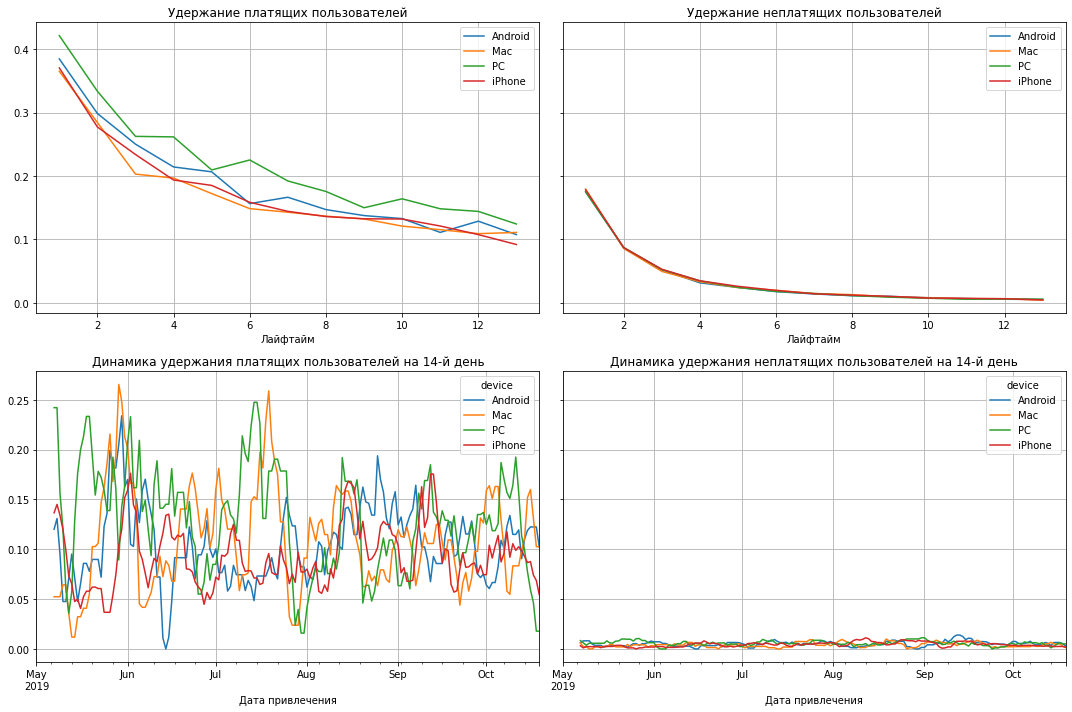

In [59]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**По графикам можно отметить, что удержание пользователей с разбивкой по устройствам практически не отличается между собой**

**Смотрим удержание с разбивкой по странам**

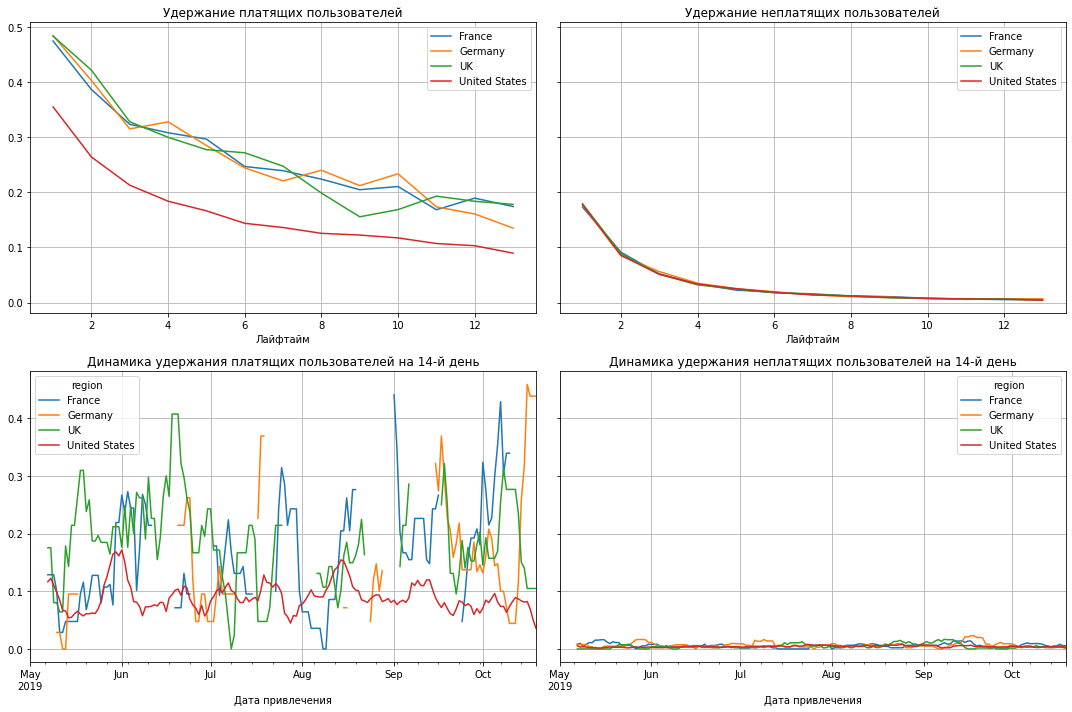

In [60]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**По графикам отчетливо видно, что удержание платящих пользователей в США происходит хуже всего**

**Смотрим удержание с разбивкой по каналам привлечения**

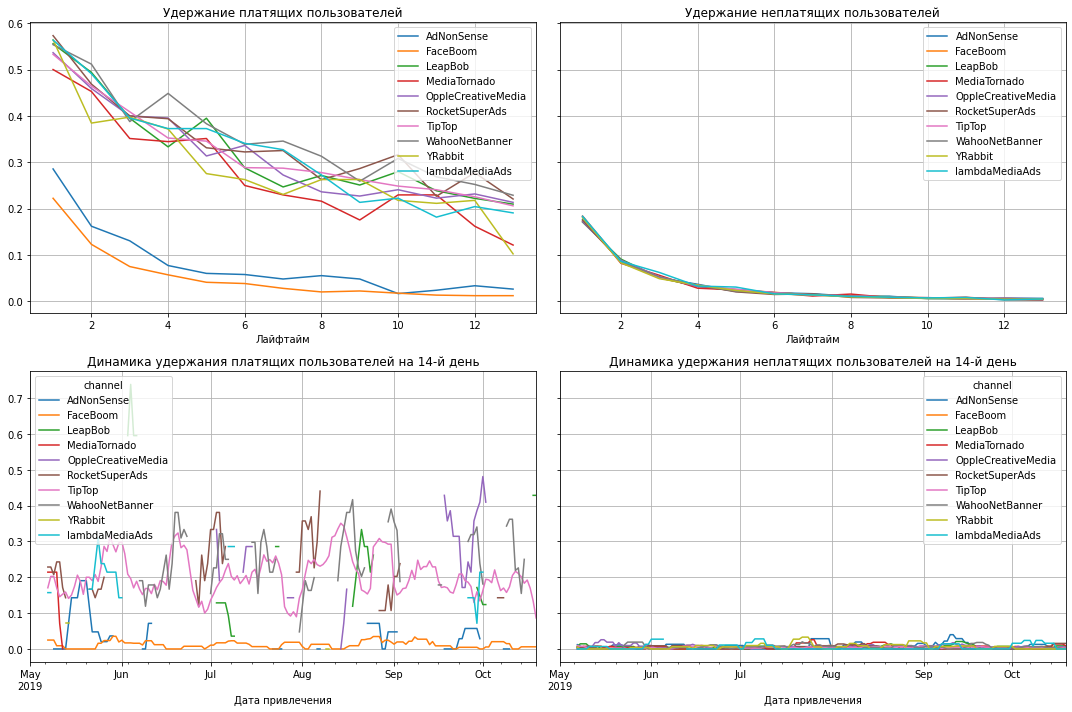

In [61]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**По графикам видно, что хуже всего из платящих пользователей удерживаются по каналам FaceBoom и AdNonSense**

### Вывод

Графики демонстрируют следующую картину:

Окупаемость рекламы:

- Имеются проблемы с окупаемости рекламы в разрезе двухнедельного периода. CAC растет - то есть затраты на рекламу растут, но при этом ROI падает - значит, что инвестиции не окупаются

- самая низкая окупаемость у владельцев фирмы Apple

- Пользователи в США обходятся дороже всего и при этом возникают проблемы с окупаемостью

- Во всех каналах, кроме: TipTop, FaceBoom и AdNonSense реклама окупается. При этом затраты на рекламу резко возрастают по каналу TipTop

Конверсия:

- Выше всего конверсия у пользователей фирмы Apple, ниже всего - у PC

- Выше всего конверсия у пользователей из США, ее показатель значительно отличается от показаетля конверсии у пользователей из других стран

- Выше всего конверсия у пользователей из рекламного канала FaceBoom. В целом динамики конверсии не наблюдается не у одного из рекламных каналов

Удержание:

- Удержание пользователей с разбивкой по устройствам практически не отличается между собой

- Удержание платящих пользователей в США происходит хуже всего

- Хуже всего из платящих пользователей удерживаются по каналам FaceBoom и AdNonSense



Отвечая на вопросы:

1. Окупается ли реклама, направленная на привлечение пользователей в целом? - Нет, не окупается.

2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? - В США, согласно данным, самое большое количество пользователей, однако именно в этой стране рекламные затраты окупаются хуже всего, а также плохо удерживаются платящие пользователи.В рамках каналов TipTop, FaceBoom и AdNonSense затраты также не окупаются.

3. Чем могут быть вызваны проблемы окупаемости? -

Каналы, которые не окупаются - TipTop, FaceBoom и AdNonSense.

Проблемы с окупаемостью по каналу TipTop в США - высокие затраты на рекламный канал при низкой окупаемости, не смотря на высокое удержание пользователей.

Проблемы с окупаемостью по каналу FaceBoom в США - низкое удержание пользователей и низкая конверсия.

Похожая ситуация с каналом AdNonSense в Европе.

Возможно причина в том, что в этих каналах находится не целевая аудитория.


Промежуточные рекомендации для рекламного отдела: увеличить долю пользователь из Франции, Германии и Англии, а также обратить свое внимание на рекламные каналы исключающие TipTop, например следует попробовать перераспределить бюджет в пользу каналов, окупаемость которых выше: например, lambdaMediaAds	в Европе и RocketSuperAds в США. Оба имеют высокий процент покупателей и низкую стоимость их привлечения.

## Вывод

**Задание:**


- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Компания развлекательного приложения Procrastinate Pro+:**

- Представлена в странах: США, Германия, Франция и Великобритания

- Использует рекламные каналы для привлечения пользователей: 

FaceBoom; AdNonSense; YRabbit; MediaTornado; RocketSuperAds; LeapBob; TipTop; WahooNetBanner; OppleCreativeMedia; lambdaMediaAds.

*Согласно данным с 1 мая по 27 октября 2019 года, а именно:*

-лог сервера с данными об их посещениях,

-выгрузка их покупок за этот период,

-рекламные расходы

*Отмечается, что:*

- Обшая сумма расходов на маркетинг - 105497.0

- Больше всего средств израсходовано на каналы: TipTop,FaceBoom,WahooNetBanner и AdNonSense.

- Отмечается рост застрат на рекламу.

- Больше всего пользователей в США, как и доля платящих пользователей (7%).В Англии и Франции практически одинаковое количество пользователей, как и доля платящих пользователей (чуть меньше 4%)В Германии меньше всего пользователей по сравнению с другими странами, однако платящих пользователей больше, чем в Англии и Франции (чуть больше 4%)

- Пользователи больше всего предпочитают использовать мобильные устройства для входа в приложение. В целом фирму Apple выбирает наибольшее количество пользователей и среди них более высокая доля платящих пользователей (около 6%), по сравнению с операционные системами PC (5%) и Android (чуть меньше 6%)

- Больше всего пользователей пришло из каналов: FaceBoom и TipTop, а также превуалирующая доля пользователй перешла по органическому поиску. При этом доля платящих пользователей выше всего у каналов: FaceBoom, AdNonSense, lambdaMediaAds и TipTop.


Главной задачей исследования стояло разобраться в ситуации: несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**В результате исследования было выявлено, что причины связаны со следующими фактами:**

- рекламные каналы FaceBoom, TipTop в США и AdNonSence в Европе не окупаются;

- платящие пользователи FaceBoom и AdNonSence плохо удерживаются;

- высокий бюджет на рекламный канал TipTop который не принес результатов.


**Рекомендации для рекламного отдела:**

- распределить рекламный бюджет для пользователей США, исключая высокие траты на каналы FaceBoom, TipTop.

- обратить внимание на рекламный канал RocketSuperAds;

- увеличить долю пользователь из стран Германии, Франции и Великобритании путем увеличения бюджета по рекламному каналу lambdaMediaAds в Европе и  RocketSuperAds в США;

- повысить привлекательную способность перехода в платные услуги для пользователей перешедших из органического поиска.